In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [2]:
# read file CSV
#đọc dữ liệu từ file csv
data = pd.read_csv("C:\\Users\\My Lam\\downloads\\penguins.csv")

In [3]:

# Use LabelEncoder to encode the 'sex' column
# Sử dụng LabelEncoder để mã hóa cột 'sex' 

label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])

In [4]:
# choosing the features to standardize
# Chọn các đặc điểm cần chuẩn hóa
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
X = data[features]

In [5]:
# Using StandarScalar to standardize the features
# Sử dụng StandardScaler để chuẩn hóa các đặc điểm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Calculating WCSS for the different value of n_clusters
# Tính toán WCSS cho các giá trị khác nhau của n_clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\My Lam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


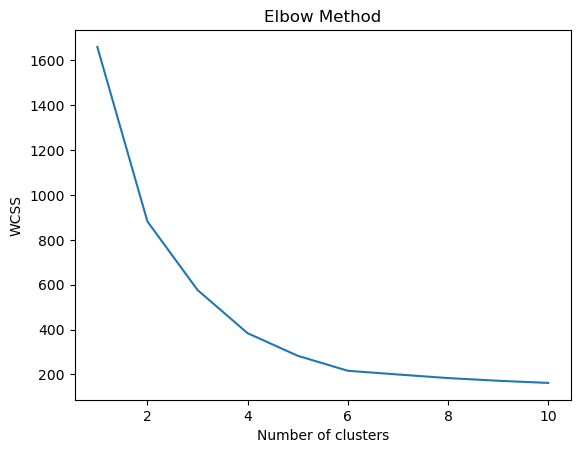

In [7]:
# Elbow chart
# Vẽ đồ thị Elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Running KMeans with the different value of n_clusters and calculate Silhouette Score
# Chạy KMeans với các giá trị khác nhau của n_clusters và tính toán Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

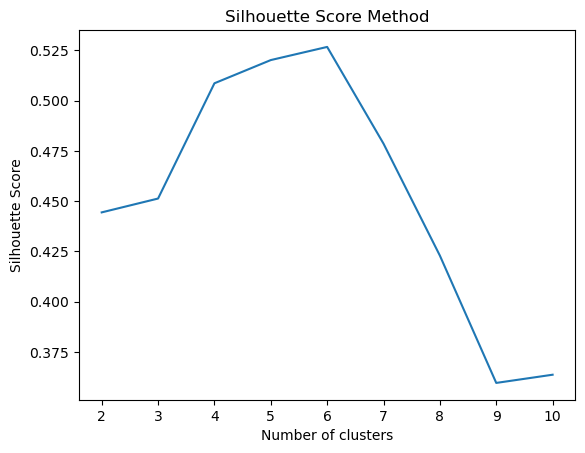

In [16]:
# Silhouette Score
# Vẽ đồ thị Silhouette Score
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [10]:
#Apply KMeans with optimal number of clusters (say choose 3 from Elbow Method or Silhouette Score)
# Áp dụng KMeans với số lượng cụm tối ưu (giả sử chọn 3 từ Elbow Method hoặc Silhouette Score)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [11]:
# Get the labels of the clusters
# Lấy nhãn của các cụm
labels = kmeans.labels_

In [12]:
# add more labels to the cluster
# Thêm nhãn cụm vào DataFrame
data['Cluster'] = labels


In [13]:
# check the data after clustering
# Kiểm tra dữ liệu sau khi phân cụm
print(data.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  \
0              39.1             18.7              181.0       3750.0    1   
1              39.5             17.4              186.0       3800.0    0   
2              40.3             18.0              195.0       3250.0    0   
3              36.7             19.3              193.0       3450.0    0   
4              39.3             20.6              190.0       3650.0    1   

   Cluster  
0        0  
1        2  
2        2  
3        2  
4        0  


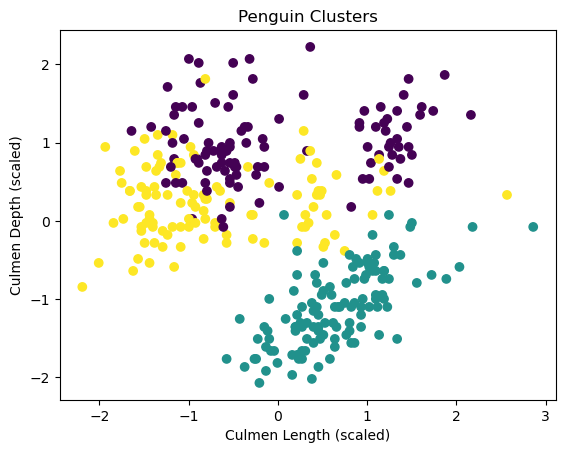

In [14]:
# reate a chart to visualize clusters
# Vẽ biểu đồ để trực quan hóa các cụm
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Culmen Length (scaled)')
plt.ylabel('Culmen Depth (scaled)')
plt.title('Penguin Clusters')
plt.show()